In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from re import compile , match

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
from re import compile , match

from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,StandardScaler 
# OneHotEncoder and OrdianlEcoder to Transform our Categorical Data Into Numerical Data
# And Simple imputer to fix Missing or NaN Values

from sklearn.compose import ColumnTransformer # To Transform our Data
from sklearn.model_selection import train_test_split # to split our Data into training and test data

from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import KFold # for Cross validataion


In [3]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# lets check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB




<h2 style='background-color:black;color:white;text-align:center;padding: 20px 50px;border-radius: 50px;border: 3px solid red'>
    Data Cleaning🧹
</h2>

In [6]:
# function to extract max_power ,torque value from max_power , torque column
def extract(string , pat = compile(r'[0-9\.]+') ):
    if string is not np.nan:
        mat = match(pat , string)
        if mat:
            return float(string[mat.start() : mat.end()])
        else:
            return np.nan
    else:
        return np.nan

In [7]:
df = df.assign(mileage = df.mileage.apply(lambda x : float(x[:-5]) if x is not np.nan else x ))
df = df.assign(max_power = df.max_power.apply(extract))
df = df.assign(engine = df.engine.apply(lambda x : float(x[:-3]) if x is not np.nan else x ))
df = df.assign(torque = df.torque.apply(extract))

<!-- ## Extracting new Features -->
<h2 style='background-color:black;color:white;text-align:center;padding: 20px 50px;border-radius: 50px;border: 3px solid red'>
    Extracting New Features 🧠
</h2>

In [8]:
df = df.assign(company = df.name.apply(lambda x : x.split()[0]))
#  = df.name.apply(lambda x : x.split()[0])

<h2 style='background-color:black;color:white;text-align:center;padding: 20px 50px;border-radius: 50px;border: 3px solid red'>
    Re-Aranging Features of DataFrame
      
</h2>

In [9]:
new_cols = ['company' ,'name' ,'year' ,'selling_price' ,'km_driven' ,'fuel' ,'seller_type' ,'transmission' ,'owner' ,'mileage' ,'engine' ,'max_power' ,'torque' ,'seats' ]
df = df[new_cols]

orignal_dataframe = df.copy()
df = df.dropna()


In [10]:
# new datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        7906 non-null   object 
 1   name           7906 non-null   object 
 2   year           7906 non-null   int64  
 3   selling_price  7906 non-null   int64  
 4   km_driven      7906 non-null   int64  
 5   fuel           7906 non-null   object 
 6   seller_type    7906 non-null   object 
 7   transmission   7906 non-null   object 
 8   owner          7906 non-null   object 
 9   mileage        7906 non-null   float64
 10  engine         7906 non-null   float64
 11  max_power      7906 non-null   float64
 12  torque         7906 non-null   float64
 13  seats          7906 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 926.5+ KB


In [11]:
df.isna().sum()

company          0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [12]:
df.shape

(7906, 14)

In [13]:
# unique cars
df.name.unique().size

1982

In [14]:
# Average Selling price
print(f'Selling Price Mean : {df.selling_price.mean():.2f}' )
print(f'Selling Price Median : {df.selling_price.median():.2f}' )

Selling Price Mean : 649813.72
Selling Price Median : 450000.00


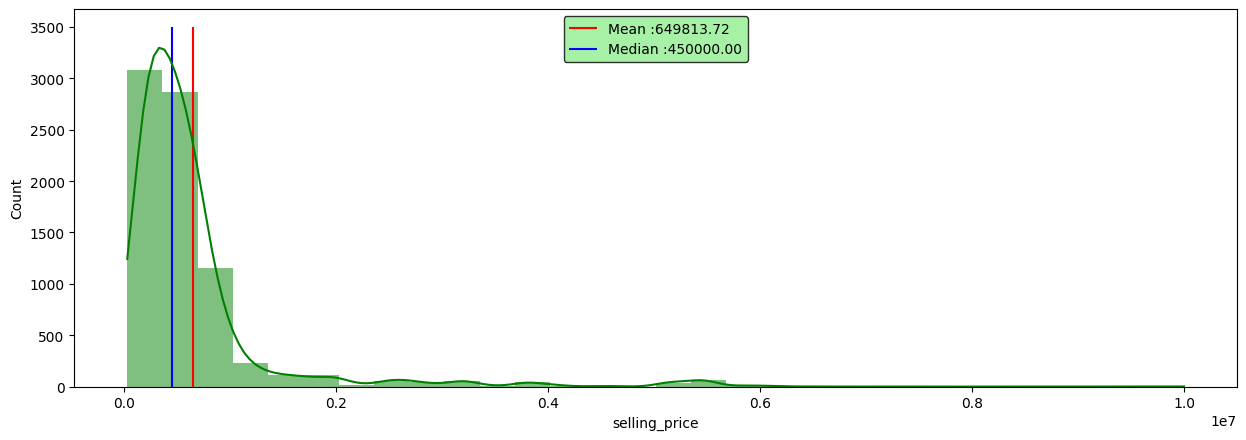

In [15]:
# lets check the distribution and skewness of selling_price
plt.figure(dpi=100 ,figsize=(15,5))
sns.histplot(df.selling_price,bins=30 , color='green',edgecolor=None , kde=True)
plt.vlines(df.selling_price.mean() , 0 , 3500 , color='red' , label=f'Mean :{df.selling_price.mean():.2f}')
plt.vlines(df.selling_price.median() , 0 , 3500 , color='blue' , label=f'Median :{np.median(df.selling_price):.2f}')
plt.legend(loc='upper center' , edgecolor='black' , facecolor='lightgreen')
plt.show()

In [16]:
# Average Selling price
print(f'Km Driven Mean : {df.km_driven.mean():.2f}' )
print(f'Km Driven Median : {df.km_driven.median():.2f}' )

Km Driven Mean : 69188.66
Km Driven Median : 60000.00


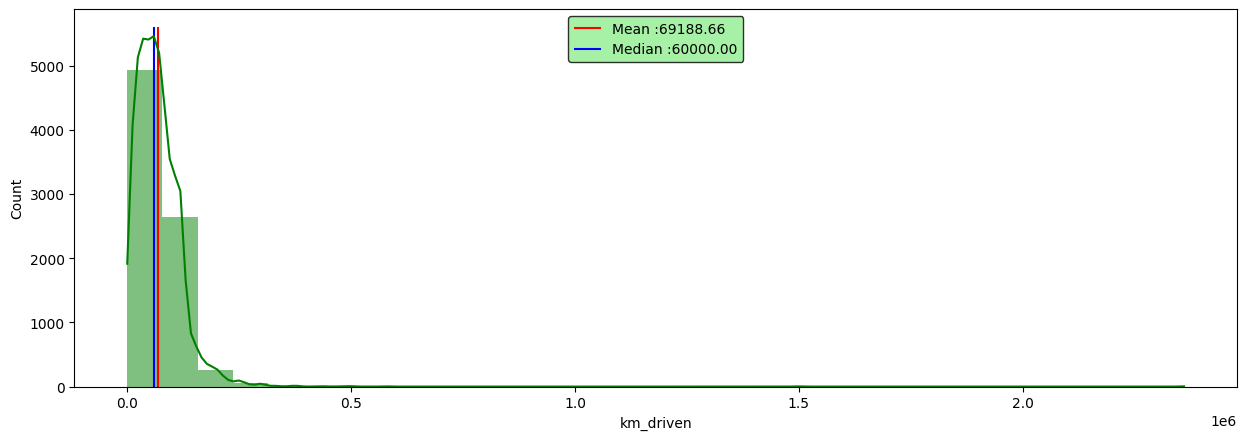

In [17]:
# lets check the distribution and skewness of km_driven
plt.figure(dpi=100 ,figsize=(15,5))
sns.histplot(df.km_driven,bins=30 , color='green',edgecolor=None , kde=True)
plt.vlines(df.km_driven.mean() , 0 , 5600 , color='red' , label=f'Mean :{df.km_driven.mean():.2f}')
plt.vlines(df.km_driven.median() , 0 , 5600 , color='blue' , label=f'Median :{np.median(df.km_driven):.2f}')
plt.legend(loc='upper center' , edgecolor='black' , facecolor='lightgreen')
plt.show()

In [18]:
# Average Mileage
print(f'Mileage Mean : {df.mileage.mean():.2f}' )
print(f'Mileage Median : {df.mileage.median():.2f}' )

Mileage Mean : 19.42
Mileage Median : 19.30


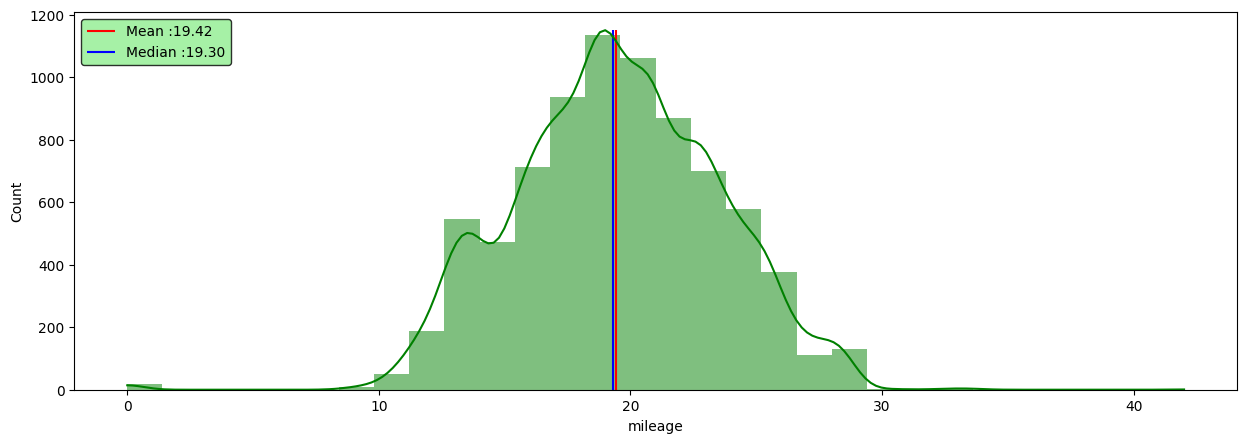

In [19]:
# lets check the distribution and skewness of mileage
plt.figure(dpi=100 ,figsize=(15,5))
sns.histplot(df.mileage,bins=30 , color='green',edgecolor=None , kde=True)
plt.vlines(df.mileage.mean() , 0 , 1150 , color='red' , label=f'Mean :{df.mileage.mean():.2f}')
plt.vlines(df.mileage.median() , 0 , 1150 , color='blue' , label=f'Median :{df.mileage.median():.2f}')
plt.legend(loc='upper left' , edgecolor='black' , facecolor='lightgreen')
plt.show()
# this is a normal distribution

In [20]:
# Average engine in cc
print(f'Engine Mean : {df.engine.mean():.2f}' )
print(f'Engine Median : {df.engine.median():.2f}' )

Engine Mean : 1458.71
Engine Median : 1248.00


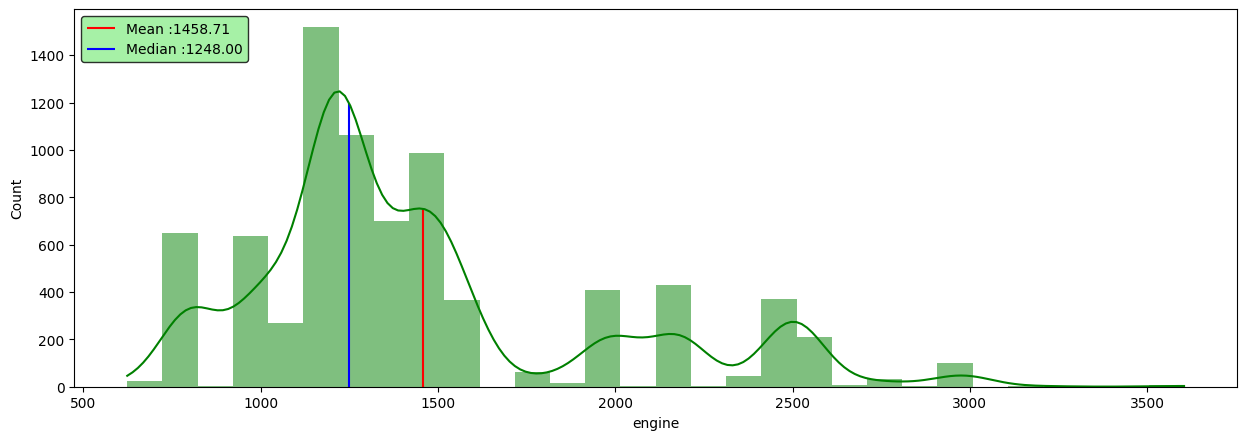

In [21]:
# lets check the distribution and skewness of engine
plt.figure(dpi=100 ,figsize=(15,5))
sns.histplot(df.engine,bins=30 , color='green',edgecolor=None , kde=True)
plt.vlines(df.engine.mean() , 0 , 750 , color='red' , label=f'Mean :{df.engine.mean():.2f}')
plt.vlines(df.engine.median() , 0 ,1200 , color='blue' , label=f'Median :{df.engine.median():.2f}')
plt.legend(loc='upper left' , edgecolor='black' , facecolor='lightgreen')
plt.show()

In [22]:
# Average max_power bhp(brake horsepower)
print(f'Max Power Mean : {df.engine.mean():.2f}' )
print(f'Max Power Median : {df.engine.median():.2f}' )

Max Power Mean : 1458.71
Max Power Median : 1248.00


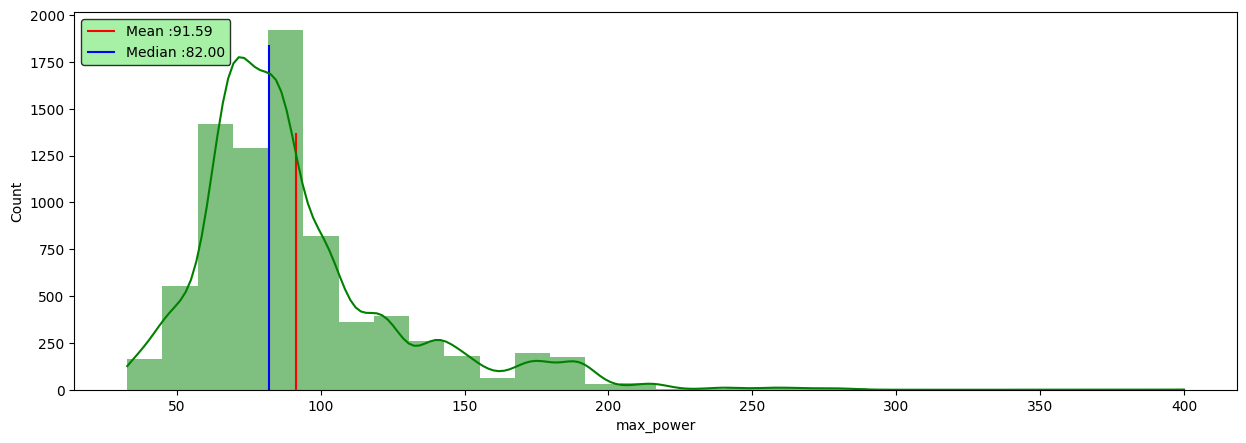

In [23]:
# lets check the distribution and skewness of engine
plt.figure(dpi=100 ,figsize=(15,5))
sns.histplot(df.max_power,bins=30 , color='green',edgecolor=None , kde=True)
plt.vlines(df.max_power.mean() , 0 , 1370 , color='red' , label=f'Mean :{df.max_power.mean():.2f}')
plt.vlines(df.max_power.median() , 0 , 1840 , color='blue' , label=f'Median :{df.max_power.median():.2f}')
plt.legend(loc='upper left' , edgecolor='black' , facecolor='lightgreen')
plt.show()

In [24]:
# Average torque nm(newton meter)
print(f'Torque Mean : {df.torque.mean():.2f}' )
print(f'Torque Median : {df.torque.median():.2f}' )

Torque Mean : 168.29
Torque Median : 154.90


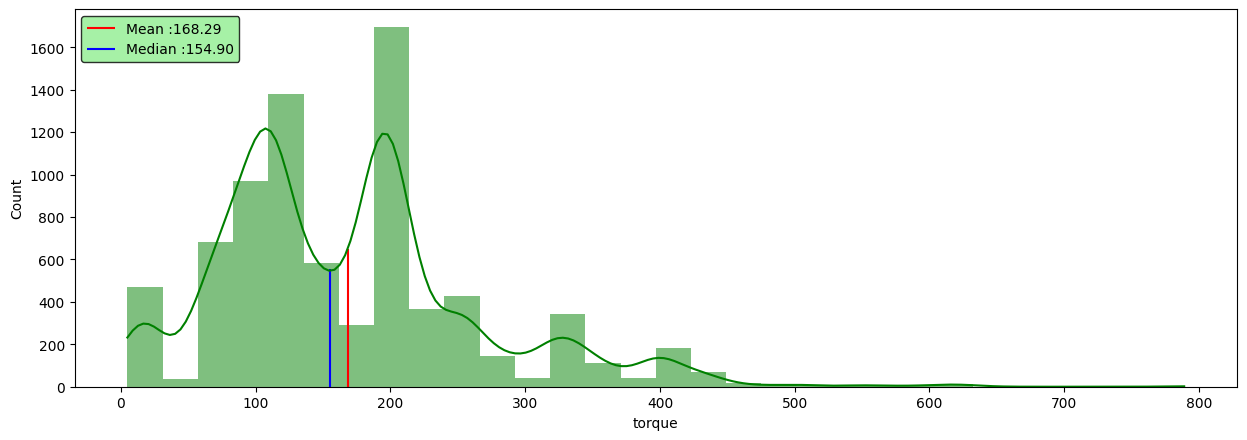

In [25]:
# lets check the distribution and skewness of torque
plt.figure(dpi=100 ,figsize=(15,5))
sns.histplot(df.torque,bins=30 , color='green',edgecolor=None , kde=True)
plt.vlines(df.torque.mean() , 0 , 650 , color='red' , label=f'Mean :{df.torque.mean():.2f}')
plt.vlines(df.torque.median() , 0 , 555 , color='blue' , label=f'Median :{df.torque.median():.2f}')
plt.legend(loc='upper left' , edgecolor='black' , facecolor='lightgreen')
plt.show()

<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 24px;border: 3px solid red;'>Average Selling Price of Each Car Company</h2>

In [26]:
df1 = df.groupby('company').agg({'selling_price':'mean' })
df1 = df1.sort_values('selling_price')

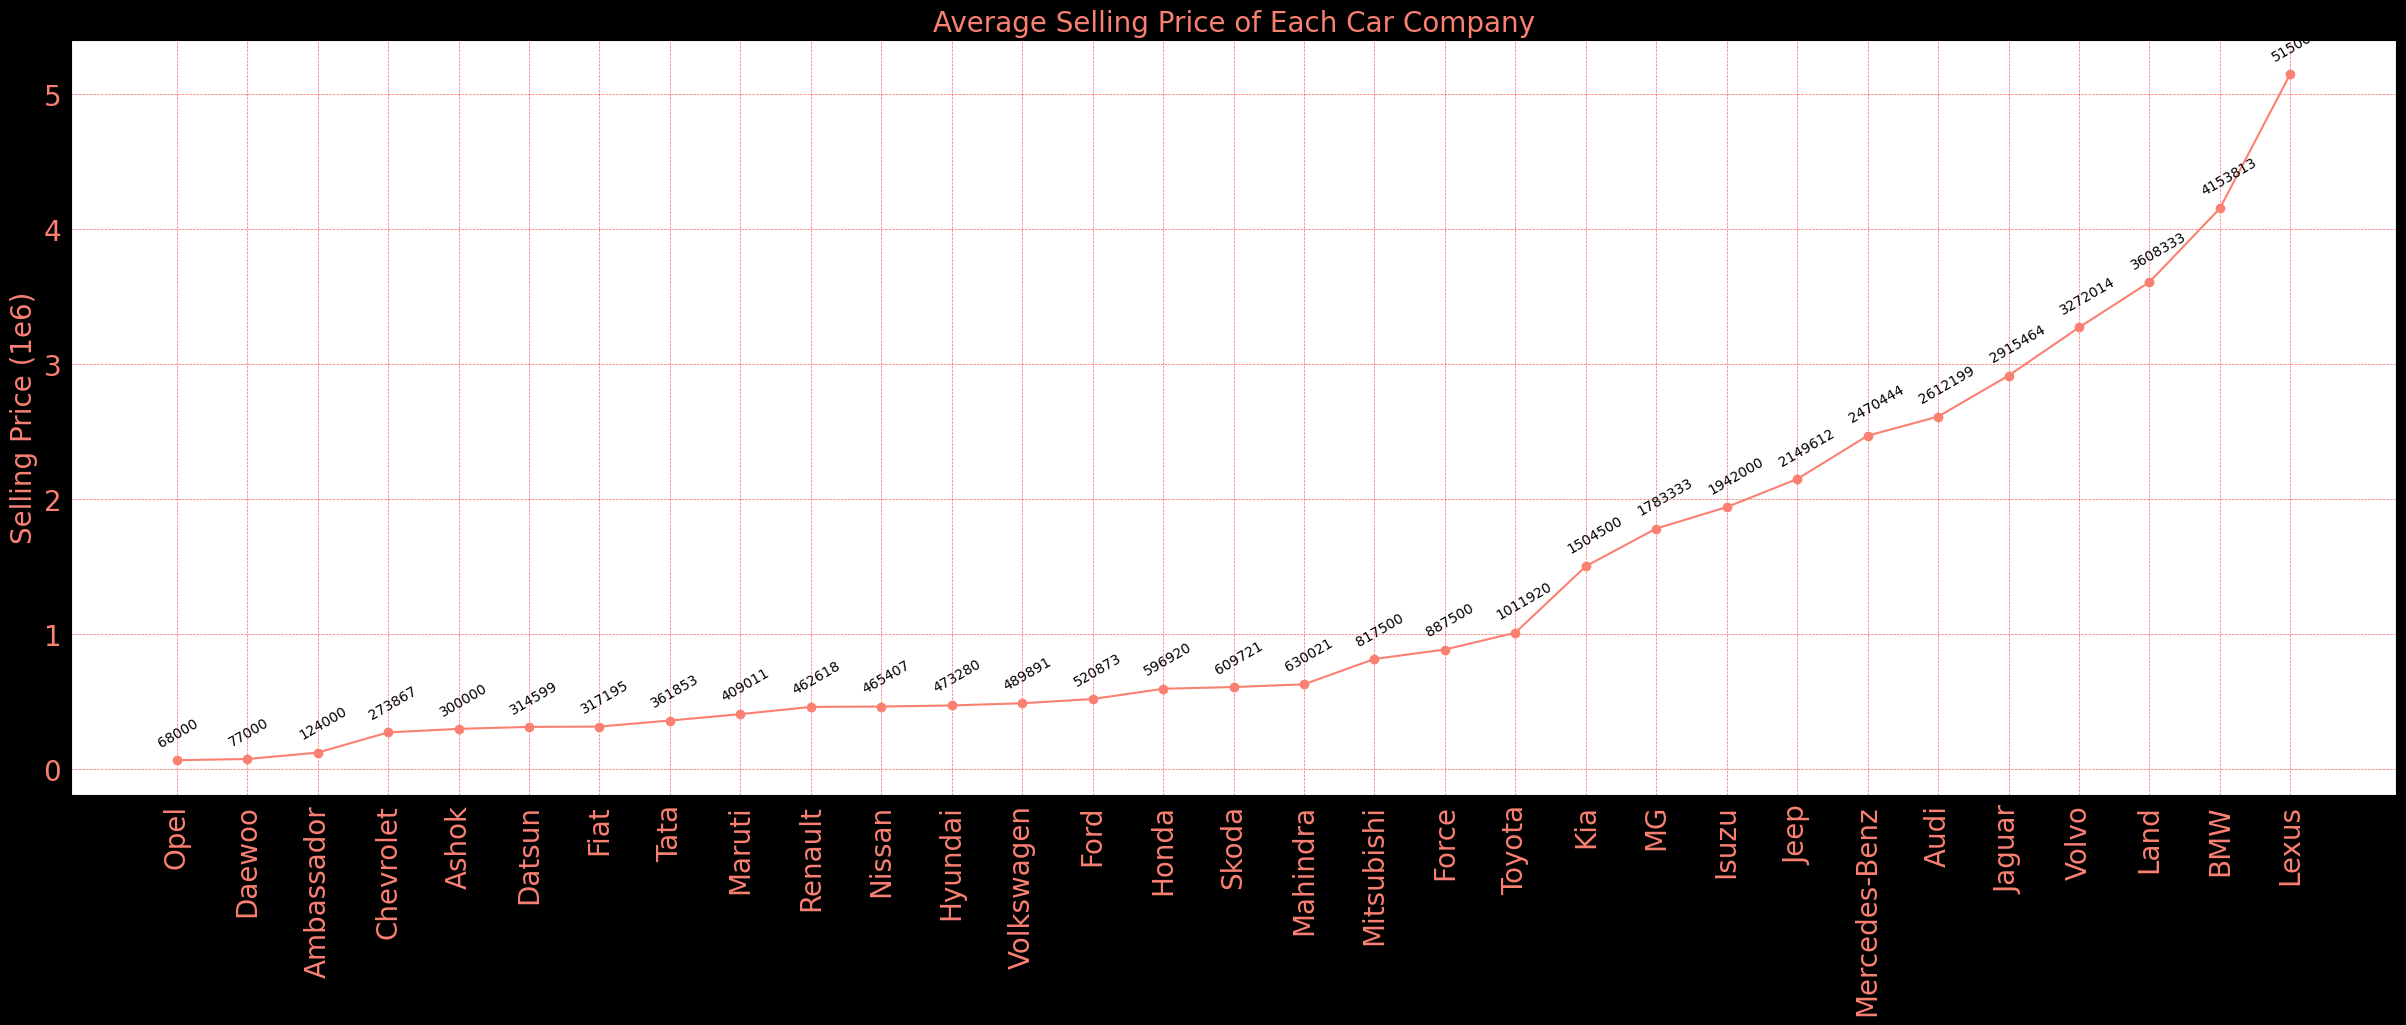

In [27]:
plt.figure(dpi=100 ,figsize=(30 ,10) , facecolor='black' ,edgecolor='lightgreen')
plt.title('Average Selling Price of Each Car Company',color='salmon' , size=20)
plt.plot(df1.index , df1.selling_price ,color='salmon' , marker='o' ,)
for idx ,val in zip(range(len(df.index)) , df1.values.flatten()):
    plt.text(idx-.3 , val+100000 , s=f'{int(val)}',rotation=30)
plt.xticks(color='salmon' ,rotation=90, size=20)
plt.ylabel('Selling Price (1e6)',color='salmon' , size=20)
plt.yticks(color='salmon',size=20)
plt.grid(ls='--' , lw='.5' , color='red' ,alpha=.6 ,)
plt.show()

<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 24px;border: 3px solid red'>Maximum Selling Price of Each Car Company</h2>

In [28]:
df1 = df.groupby('company').agg({'selling_price':'max' })
df1 = df1.sort_values('selling_price')

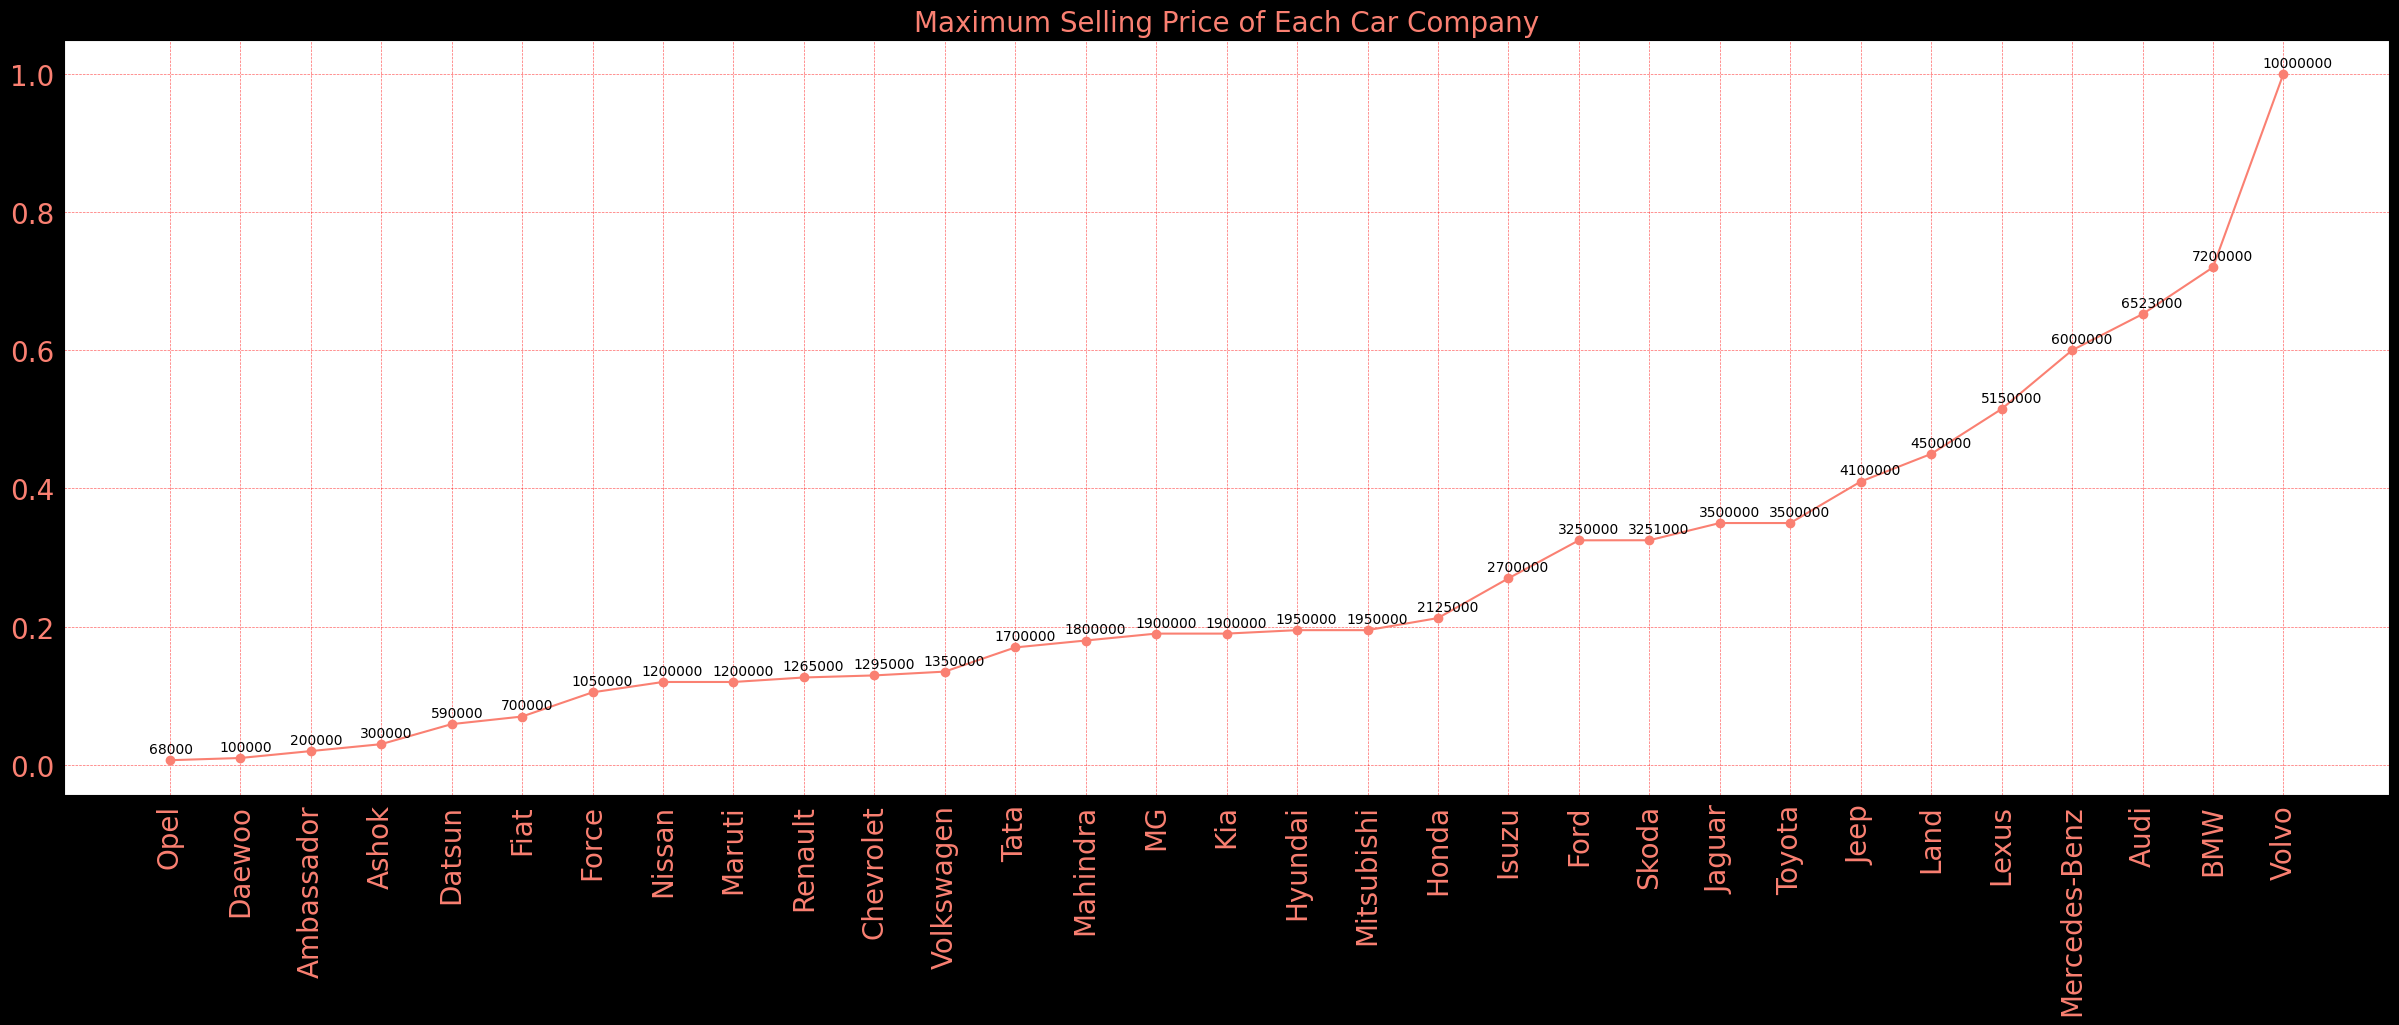

In [29]:
plt.figure(dpi=100 ,figsize=(30 ,10) , facecolor='black' ,edgecolor='lightgreen')
plt.title('Maximum Selling Price of Each Car Company',color='salmon' , size=20)
plt.plot(df1.index , df1.selling_price ,color='salmon' , marker='o' ,)
for idx ,val in zip(range(len(df.index)) , df1.values.flatten()):
    plt.text(idx-.3 , val+100000 , s=f'{val}')
plt.xticks(color='salmon' ,rotation=90, size=20)
plt.yticks(color='salmon',size=20)
plt.grid(ls='--' , lw='.5' , color='red' ,alpha=.6 ,)
plt.show()

<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 24px;border: 3px solid red'>Minimum Selling Price of Each Car Company</h2>

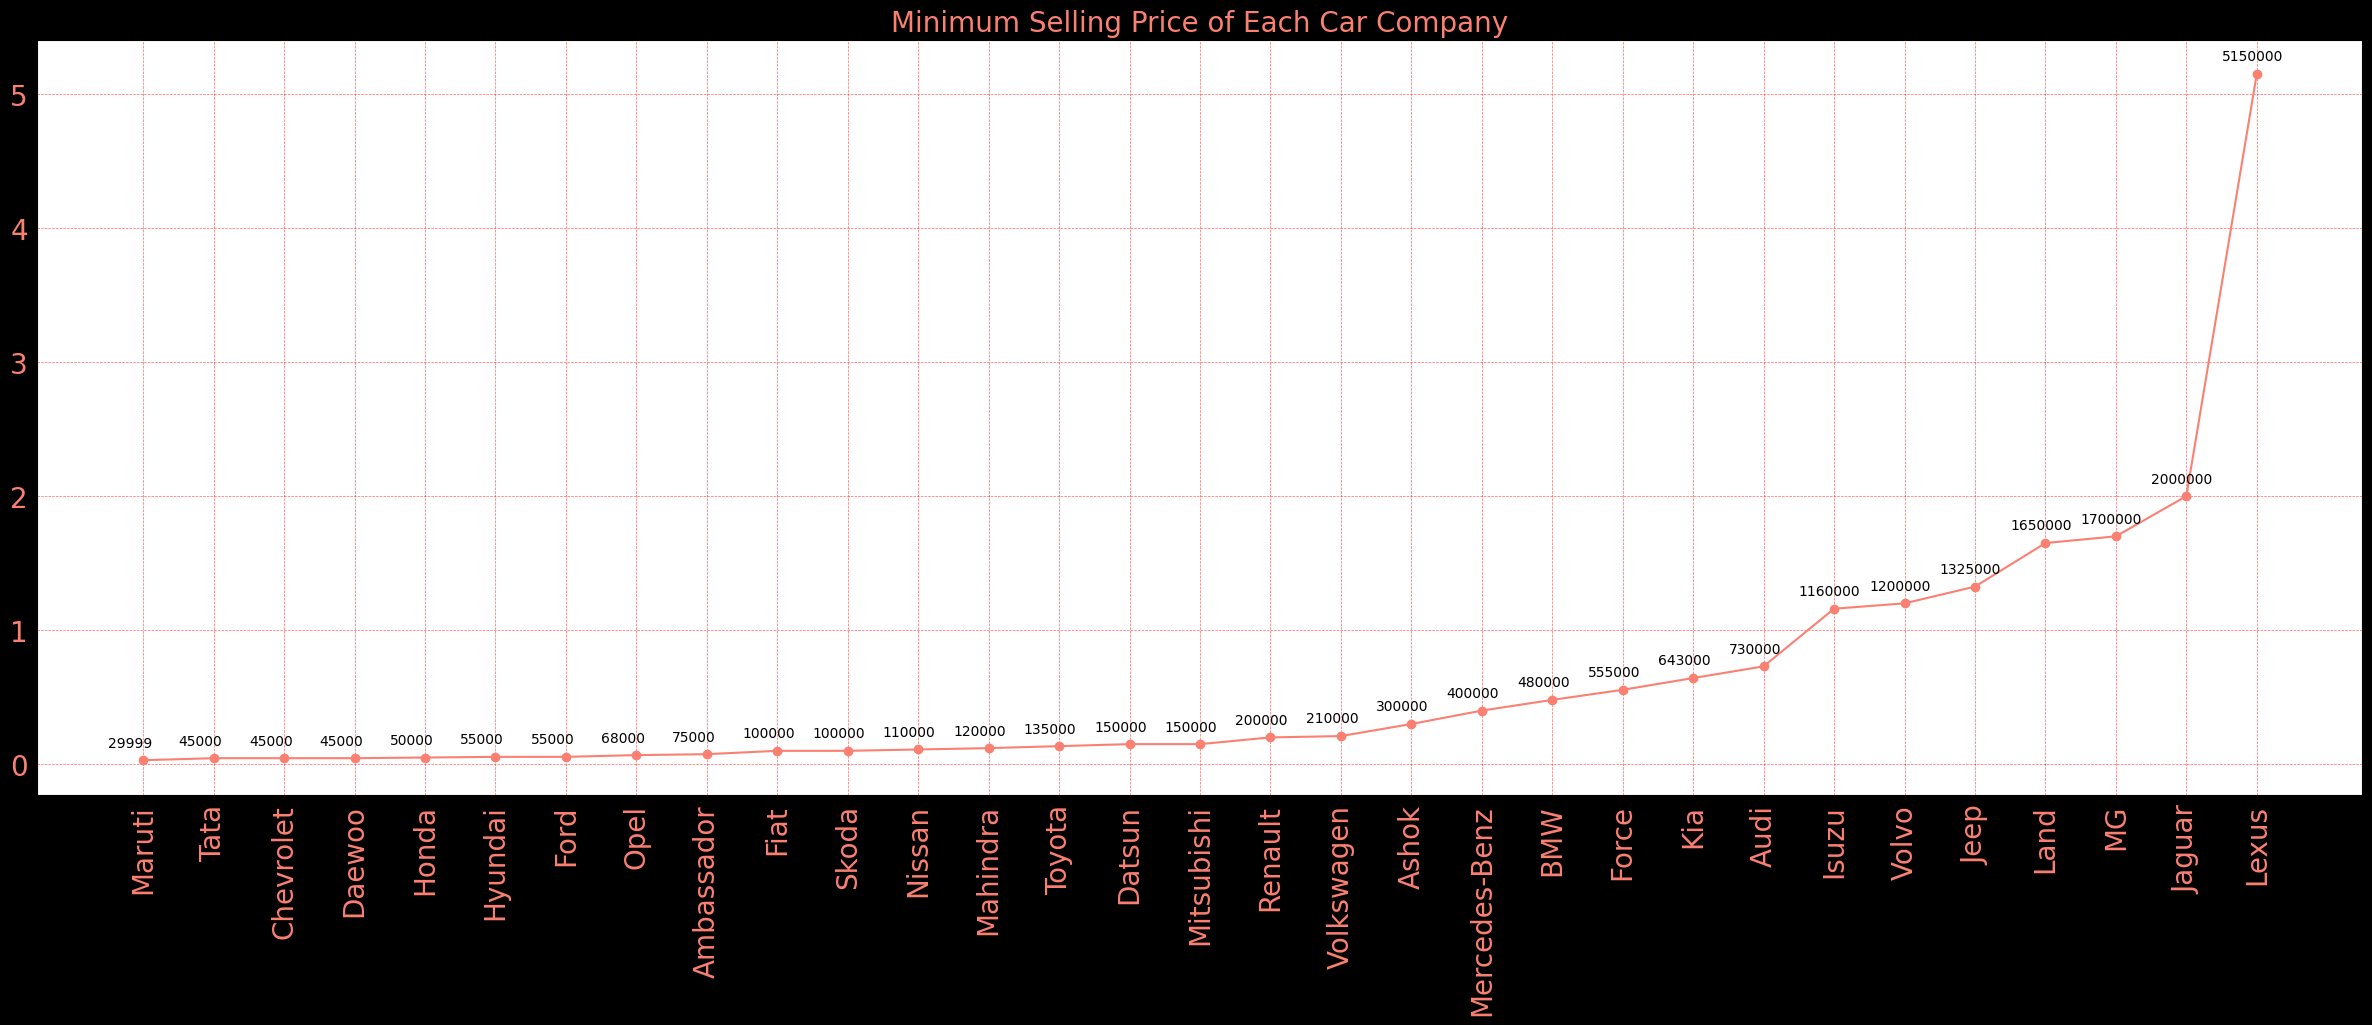

In [30]:
df1 = df.groupby('company').agg({'selling_price':'min' })
df1 = df1.sort_values('selling_price')

plt.figure(dpi=100 ,figsize=(30 ,10) , facecolor='black' ,edgecolor='lightgreen')
plt.title('Minimum Selling Price of Each Car Company',color='salmon' , size=20)
plt.plot(df1.index , df1.selling_price ,color='salmon' , marker='o' ,)
for idx ,val in zip(range(len(df.index)) , df1.values.flatten()):
    plt.text(idx-.5 , val+100000 , s=f'{val}')
plt.xticks(color='salmon' ,rotation=90, size=20)
plt.yticks(color='salmon',size=20)
plt.grid(ls='--' , lw='.5' , color='red' ,alpha=.6 ,)
plt.show()


<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 24px;border: 3px solid red'>Lets Check How Owner-Type Affects Selling Price</h2>

In [31]:
df.head()

,company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0
3,Hyundai,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0


In [32]:
df1 = df.groupby('owner').agg({'owner':'count', 'selling_price':'sum'})
df1['avg'] = df1.selling_price // df1.owner
df1

,owner,selling_price,avg
owner,,,
First Owner,5215,4119745048,789979
Fourth & Above Owner,160,37311492,233196
Second Owner,2016,808826224,401203
Test Drive Car,5,22019000,4403800
Third Owner,510,149525513,293187


      From The Above Data Frame :
            We can say that Selling Price of one Car having Frist Owner is 783086 
            While Price of One car having Second Owner is 392964. and if the Car is Having 
            Third ,Fourth or Above is 284015 , 225813** --> 
        
     So we can say that ownership negatively affects Selling Price of a car
    

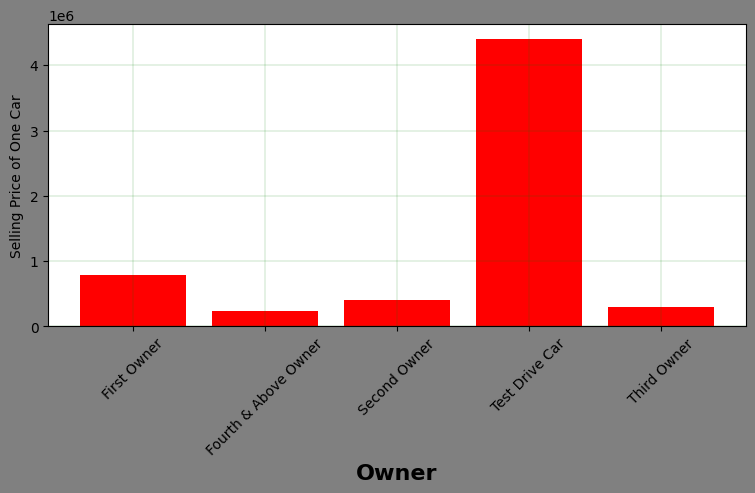

In [33]:
plt.figure(dpi=100 , figsize=(9,4),facecolor='grey')
plt.bar(df1.index , df1.avg , color='red')
plt.xticks(rotation=45)
plt.xlabel('Owner' ,  color='Black' , weight='heavy' ,size=16)
plt.ylabel('Selling Price of One Car')
plt.grid(':',color='green',alpha=.5 , lw=.3)
plt.show()

<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 24px;transition: 0.25s;border: 3px solid red'> Lets Check how Avg. of Selling-Price Varies by Transmission</h2>

In [34]:
df1 = df.groupby('transmission').agg({'selling_price':'sum','transmission':'count'})
df1['avg'] = (df1.selling_price / df1.transmission).astype(dtype=np.int32)
df1

,selling_price,transmission,avg
transmission,,,
Automatic,1960173984,1041,1882972
Manual,3177253293,6865,462819


<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 24px;transition: 0.25s;border: 3px solid red'> Lets Check how Avg. of Selling-Price Varies by Fuel-Type</h2>

In [35]:
df1 =df.groupby('fuel').agg({'selling_price':'mean'})
df1

,selling_price
fuel,
CNG,317903.788462
Diesel,802450.282624
LPG,210885.714286
Petrol,472665.203125


Text(0, 0.5, 'Avg Price')

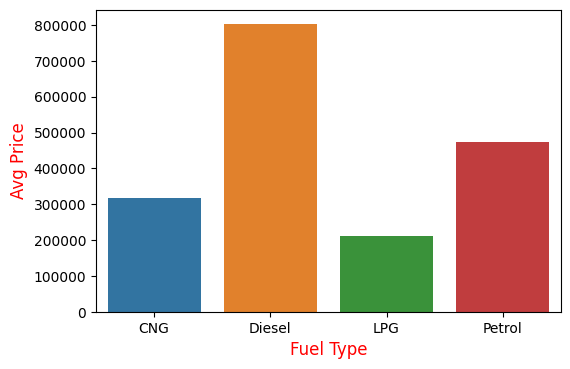

In [36]:
plt.figure(dpi=100)
sns.barplot(x=df1.index , y = df1.selling_price , data=df1)
plt.xlabel('Fuel Type' , size=12 , color='red')
plt.ylabel('Avg Price' , size=12, color='red')

<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 30px;transition: 0.25s;border: 3px solid red'>Lets check the Frequency of each Category of Fuel in Our Data-Frame</h2>

In [37]:
df1 =df.groupby('fuel').agg({'fuel':'count'})
df1

,fuel
fuel,
CNG,52
Diesel,4299
LPG,35
Petrol,3520


Text(0, 0.5, 'Frequency')

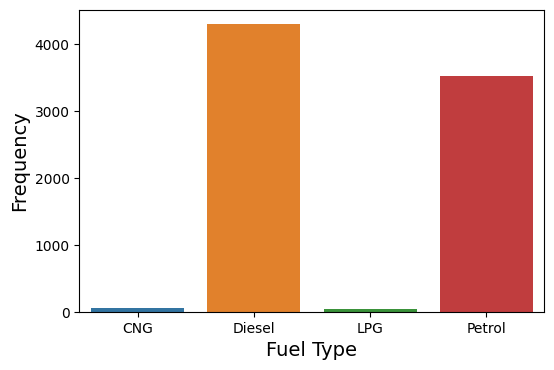

In [38]:
plt.figure(dpi=100)
sns.barplot(x=df1.index , y = df1.fuel , data=df1)
plt.xlabel('Fuel Type' , size=14)
plt.ylabel('Frequency' , size=14)

<h2 style='background-color:black;color:white;text-align:center;padding: 14px 50px;border-radius: 30px;transition: 0.25s;border: 3px solid red'>
    Lets Check Average Selling Price by No. Of Seats

</h2>

In [39]:
df1 = df.groupby('seats').agg({'selling_price':'mean','seats':'count'})
df1

,selling_price,seats
seats,,
2.0,700500.000000,2
4.0,486764.661654,133
5.0,630044.551807,6254
6.0,581596.774194,62
7.0,812923.184821,1120
8.0,585855.280851,235
9.0,500074.937500,80
10.0,344105.105263,19
14.0,235000.000000,1


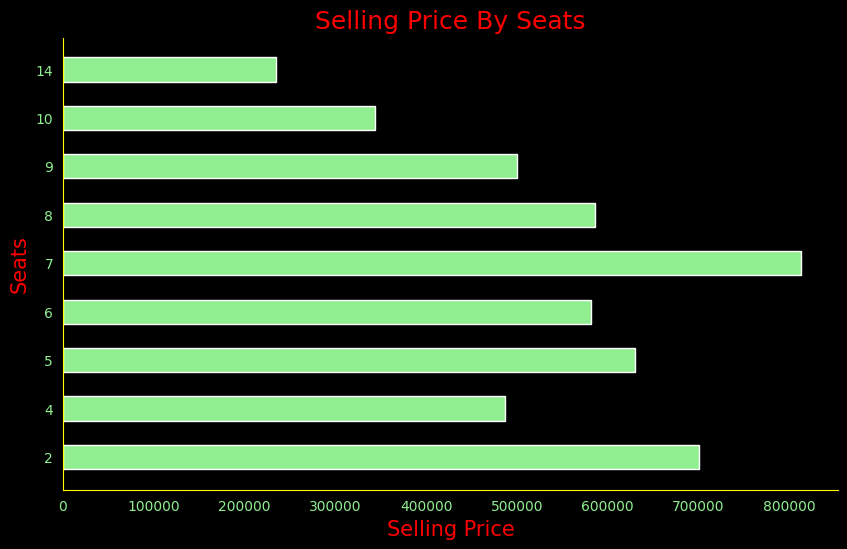

In [40]:
plt.figure(dpi=100 , figsize=(10,6),frameon=True,facecolor='black')
plt.title('Selling Price By Seats' , color='red', size=18)
ax = plt.gca()
plt.barh(np.arange(9) , df1.selling_price,color='lightgreen',height=.5,edgecolor='w')
ax.set_facecolor('black')
for i in ['left' , 'bottom']:
    ax.spines[i].set_color('Yellow')
plt.yticks(np.arange(9), map(int,df1.index),color='lightgreen')
plt.xticks(color='lightgreen')
plt.xlabel('Selling Price',size=15,color='red')
plt.ylabel('Seats',size=15,color='red')
plt.show()

<h2 style='background-color:black;color:white;text-align:center;padding: 20px 10px;border-radius: 70px;transition: 0.25s;border: 3px solid red'>
    Lets Check the Correlation Plots
</h2>
<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Selling-Price Km-Driven
</h3>

In [41]:
np.corrcoef(df.selling_price , df.km_driven)

array([[ 1.        , -0.22215848],
       [-0.22215848,  1.        ]])

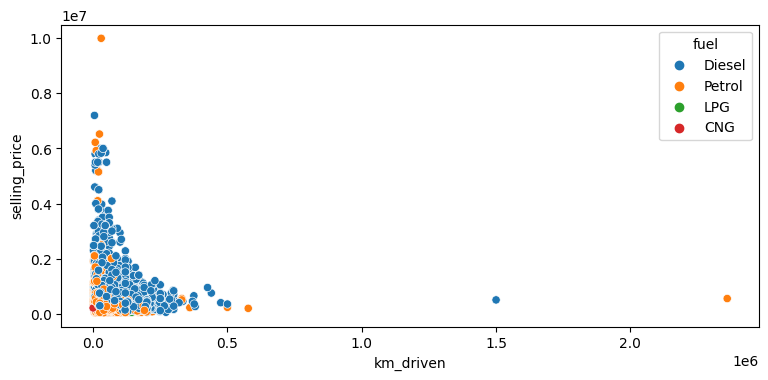

In [42]:
plt.figure(dpi=100,figsize=(9,4))
sns.scatterplot(x='km_driven' , y='selling_price', data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Selling-Price and Mileage
</h3>

In [43]:
np.corrcoef(df.selling_price , df.mileage)[0 ,1]

-0.12627994951355337

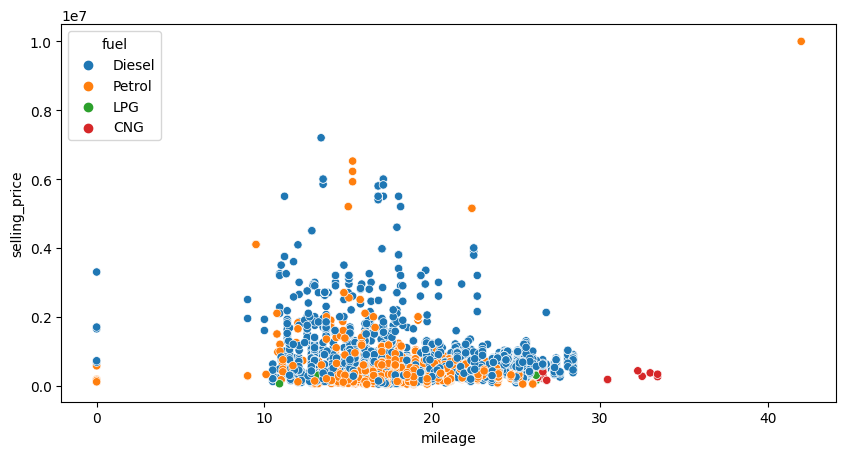

In [44]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'mileage',y='selling_price' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Selling-Price and Engine
</h3>

In [45]:
np.corrcoef(df.selling_price , df.engine)[0 ,1]

0.45568180003561465

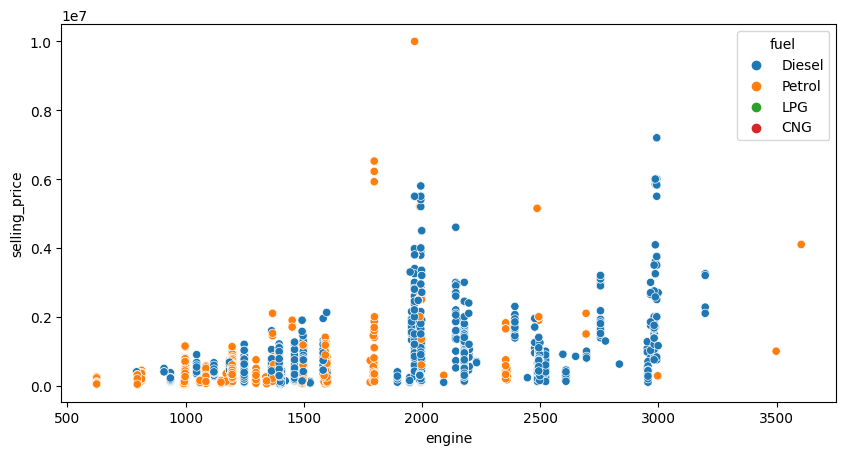

In [46]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'engine',y='selling_price' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Selling-Price and Max Power
</h3>

In [47]:
np.corrcoef(df.selling_price , df.max_power)[0 ,1]

0.7496737800444904

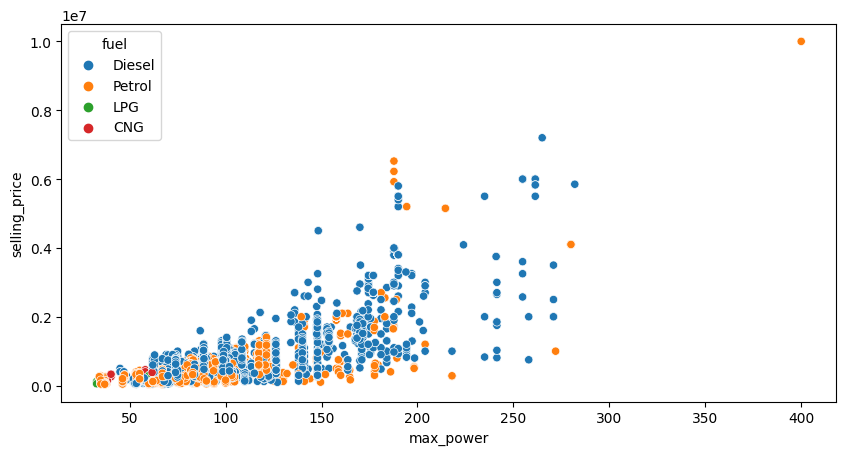

In [48]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'max_power',y='selling_price' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Selling-Price and Torque
</h3>

In [49]:
np.corrcoef(df.selling_price , df.torque)[0 ,1]

0.6197922027553991

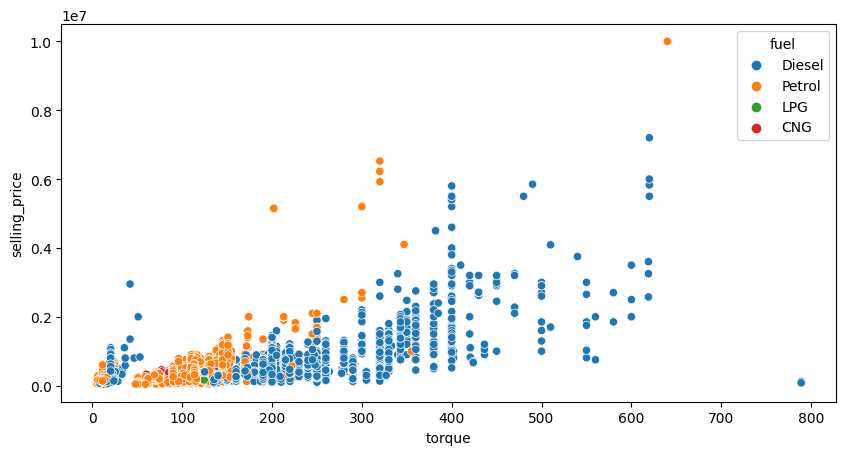

In [50]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'torque',y='selling_price' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Selling-Price and Seats
</h3>

In [51]:
np.corrcoef(df.selling_price , df.seats)[0 ,1]

0.041616693830263535

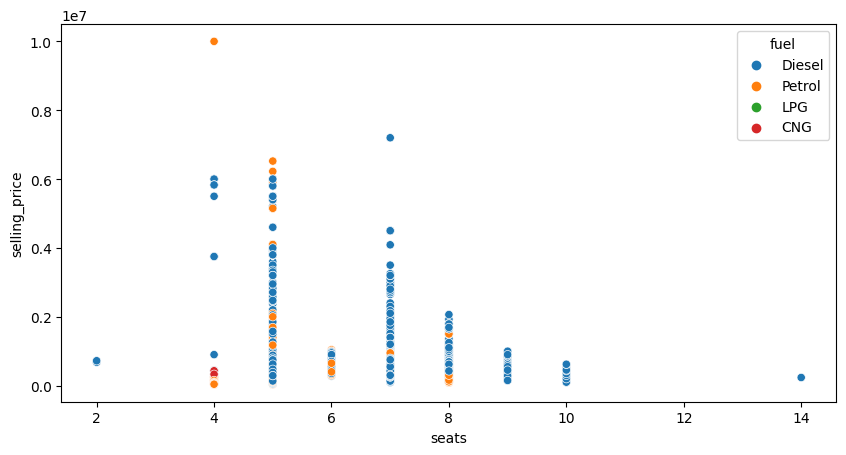

In [52]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'seats',y='selling_price' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Engine and Max Power 
</h3>

In [53]:
np.corrcoef(df.engine ,df.max_power)

array([[1.        , 0.70397453],
       [0.70397453, 1.        ]])

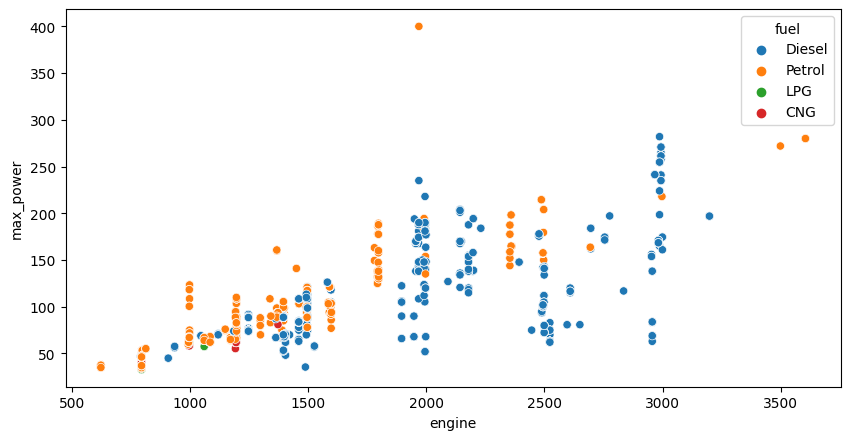

In [54]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'engine',y='max_power' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Engine and Torque
</h3>

In [55]:
np.corrcoef(df.engine ,df.torque)

array([[1.        , 0.62886835],
       [0.62886835, 1.        ]])

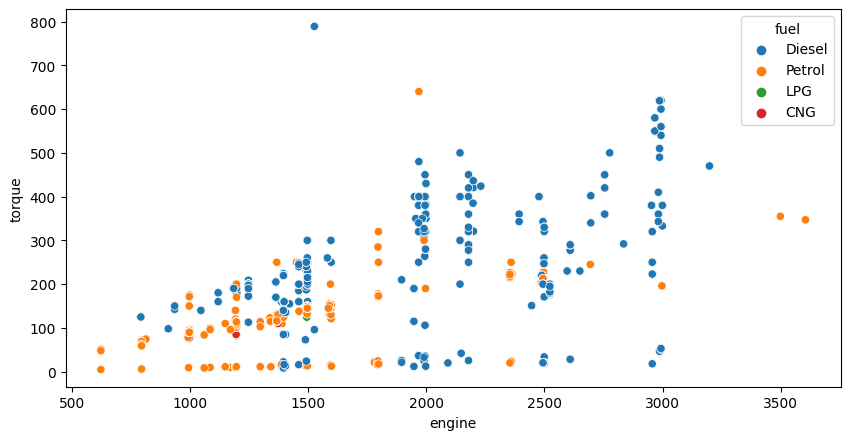

In [56]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'engine',y='torque' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Max Power and Torque
</h3>

In [57]:
np.corrcoef(df.max_power ,df.torque)

array([[1.       , 0.7702059],
       [0.7702059, 1.       ]])

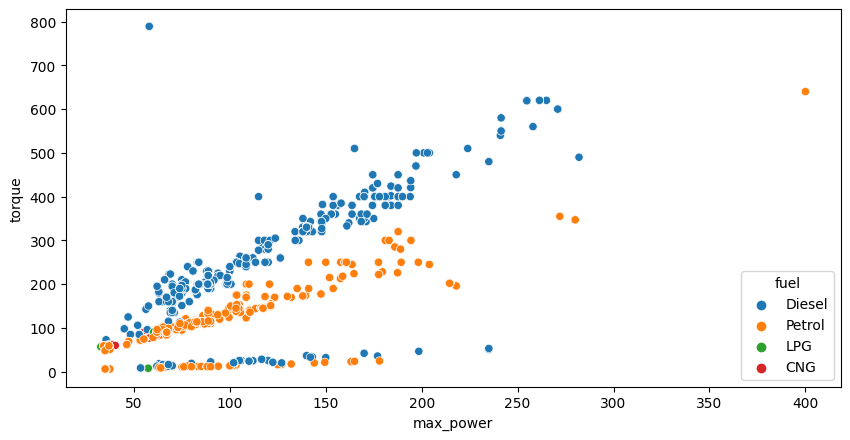

In [58]:
plt.figure(dpi=100,figsize=(10,5))
sns.scatterplot( x = 'max_power',y='torque' ,data=df,hue='fuel')
plt.show()

<h3 style='background-color:lightgreen;text-align:center;padding: 14px 24px;border-radius: 30px;transition: 0.25s;border: 3px solid darkgreen'>
    Lets Check the Correlation b/w Max Power and Seats
</h3>

In [59]:
np.corrcoef(df.max_power , df.seats)[0 ,1]

0.19199918279535919

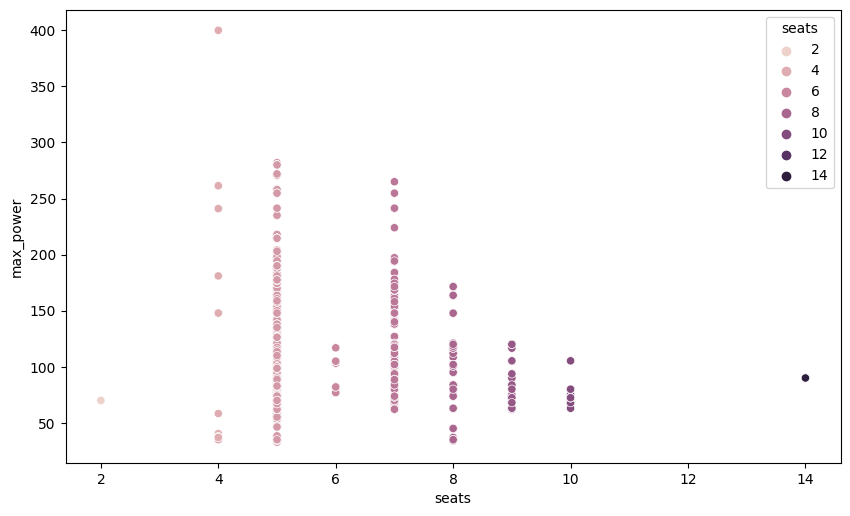

In [60]:
plt.figure(dpi=100 , figsize= (10,6))
sns.scatterplot(x = df.seats , y = df.max_power ,data=df , hue='seats')
plt.show()

In [61]:
o_df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')
o_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [62]:
X = o_df.drop('selling_price' ,axis=1 )
y = o_df['selling_price']

## Splittting Our Data In to Training and Test Data

In [63]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=42,)
print('x_train shape : ',x_train.shape )
x_train.head()

x_train shape :  (6502, 12)


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6518,Tata Tiago NRG Petrol AMT,2019,2560,Petrol,Individual,Automatic,First Owner,24.0 kmpl,1199 CC,83.81 bhp,114Nm@ 3500rpm,5.0
6144,Honda Brio S MT,2013,80000,Petrol,Individual,Manual,Second Owner,19.4 kmpl,1198 CC,86.8 bhp,109Nm@ 4500rpm,5.0
6381,Hyundai i20 1.4 CRDi Asta,2011,150000,Diesel,Individual,Manual,Fourth & Above Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
438,Maruti Swift Dzire VDI,2013,120000,Diesel,Individual,Manual,Second Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5939,Maruti Alto K10 VXI,2017,25000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0


# Creating Custom Transformer to Extract and Pre-Process our Data

In [64]:
class Add_Features(BaseEstimator , TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self ,X , y=None):
        return self
    
    def extract(self ,string , pat = compile(r'^[0-9\.]+')) :
        if string is not np.nan:
            mat = match(pat , string)
            if mat:
                return float(string[mat.start() : mat.end()])
            else:
                return np.nan
        else:
            return np.nan

    def transform(self , X ,y=None):
        X['name'] = list(map( lambda x : x.split()[0] , X.name))
        X['torque'] = list(map(self.extract , X.torque))
        X['mileage'] = list(map( self.extract, X.mileage))
        X['engine'] = list(map(self.extract, X.engine ))
        X['max_power'] = list(map(self.extract , X.max_power))
        return X

In [65]:
# Creating a List of Numerical and Categorical Features
num_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
cat_ord_features = ['fuel' ,'name', 'owner' ,'seller_type', 'transmission']

In [66]:
# Creating Numerical Pipeline to Fix NaN Values and Scale Our Data
num_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy='median')),
    ('scale' , StandardScaler()),
])

In [67]:
# Creating Final Column Transformer  that will Transformers over dData
final_pipeline = ColumnTransformer([
    ('numerical pipeline' , num_pipeline , num_features),
    ('categoricat ordinal' , OrdinalEncoder() ,cat_ord_features )
])

## Applying Our custom transformer over Training and test Data

In [68]:
obj = Add_Features()
obj.fit(x_train)
x_train_tr = obj.transform(x_train)
x_test_tr = obj.transform(x_test)
x_train_tr

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6518,Tata,2019,2560,Petrol,Individual,Automatic,First Owner,24.00,1199.0,83.81,114.0,5.0
6144,Honda,2013,80000,Petrol,Individual,Manual,Second Owner,19.40,1198.0,86.80,109.0,5.0
6381,Hyundai,2011,150000,Diesel,Individual,Manual,Fourth & Above Owner,23.00,1396.0,90.00,22.4,5.0
438,Maruti,2013,120000,Diesel,Individual,Manual,Second Owner,23.40,1248.0,74.00,190.0,5.0
5939,Maruti,2017,25000,Petrol,Individual,Manual,First Owner,23.95,998.0,67.05,90.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5226,Mahindra,2009,120000,Diesel,Individual,Manual,First Owner,12.05,2179.0,120.00,290.0,7.0
5390,Maruti,2014,80000,Diesel,Individual,Manual,Second Owner,23.40,1248.0,74.00,190.0,5.0
860,Hyundai,2016,35000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,114.7,5.0
7603,Maruti,2019,27000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,190.0,5.0


In [69]:
# Final Transformation of Our Data
final_pipeline.fit(x_train_tr)
x_train_tr2 = final_pipeline.transform(x_train_tr)
print('Shape of Final Training Data : ',x_train_tr2.shape)
x_test_tr2 = final_pipeline.transform(x_test_tr)
print('Shape of Final Test Data : ',x_test_tr2.shape)

Shape of Final Training Data :  (6502, 12)
Shape of Final Test Data :  (1626, 12)


In [70]:
# lets hav ea look at our final data in DataFrame Formate
print('Fianl Training Data')
pd.DataFrame(x_train_tr2 , columns=num_features + cat_ord_features)

Fianl Training Data


,year,km_driven,mileage,engine,max_power,torque,seats,fuel,name,owner,seller_type,transmission
0,1.279377,-1.156592,1.157043,-0.513716,-0.212283,-0.563747,-0.426905,3.0,28.0,0.0,1.0,0.0
1,-0.196059,0.170496,-0.001321,-0.515723,-0.127802,-0.615467,-0.426905,3.0,10.0,2.0,1.0,1.0
2,-0.687871,1.370086,0.905225,-0.118286,-0.037388,-1.511257,-0.426905,1.0,11.0,1.0,1.0,1.0
3,-0.196059,0.855976,1.005952,-0.415360,-0.489460,0.222397,-0.426905,1.0,20.0,2.0,1.0,1.0
4,0.787565,-0.772038,1.144452,-0.917174,-0.685828,-0.812003,-0.426905,3.0,20.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6497,-1.179683,0.855976,-1.852186,1.453395,0.810247,1.256796,1.687137,1.0,19.0,0.0,1.0,1.0
6498,0.049847,0.170496,1.005952,-0.415360,-0.489460,0.222397,-0.426905,1.0,20.0,2.0,1.0,1.0
6499,0.541659,-0.600668,-0.202776,-0.517730,-0.268227,-0.556506,-0.426905,3.0,11.0,0.0,1.0,1.0
6500,1.279377,-0.737764,2.265044,-0.415360,-0.488895,0.222397,-0.426905,1.0,20.0,0.0,1.0,1.0


In [71]:
from sklearn.metrics import mean_squared_error , r2_score
def rmse(y , y_hat):
    return np.sqrt(mean_squared_error(y , y_hat))

In [72]:
def Model_Report(models , x_train ,x_test ,y_train , y_test):
    model.fit(x_train , y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    
    print(f'Training RMSE Error : {rmse(y_train , y_hat_train):.2f}')
    print(f'Test RMSE Error   : {rmse(y_test , y_hat_test):.2f}')
    print()
    print(f'Training Accuracy : {r2_score(y_train , y_hat_train):.2f}')
    print(f'Test Accuracy : {r2_score(y_test , y_hat_test):.2f}')



In [73]:
model = RandomForestRegressor(n_estimators=50) 
Model_Report(model ,x_train_tr2 , x_test_tr2 , y_train , y_test)

Training RMSE Error : 57292.40
Test RMSE Error   : 137532.90

Training Accuracy : 0.99
Test Accuracy : 0.97


<h3>Cross Validation</h3>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

In [74]:
folds = KFold(n_splits = 5)
c=1
for tr_idx , ts_idx in folds.split(x_train_tr2):
    print('_'*50)
    print()
    print('Fold :',c)
    print('-'*8)
    print()
    train_x = x_train_tr2[tr_idx]
    test_x = x_train_tr2[ts_idx]
    train_y = y_train.iloc[tr_idx]
    test_y = y_train.iloc[ts_idx]
    Model_Report(model ,train_x ,test_x ,train_y ,test_y)
    print('_'*50)
    c+=1

__________________________________________________

Fold : 1
--------

Training RMSE Error : 58783.67
Test RMSE Error   : 183645.25

Training Accuracy : 0.99
Test Accuracy : 0.95
__________________________________________________
__________________________________________________

Fold : 2
--------

Training RMSE Error : 60936.53
Test RMSE Error   : 126091.42

Training Accuracy : 0.99
Test Accuracy : 0.98
__________________________________________________
__________________________________________________

Fold : 3
--------

Training RMSE Error : 59719.93
Test RMSE Error   : 135725.17

Training Accuracy : 0.99
Test Accuracy : 0.97
__________________________________________________
__________________________________________________

Fold : 4
--------

Training RMSE Error : 58420.23
Test RMSE Error   : 139941.12

Training Accuracy : 0.99
Test Accuracy : 0.97
__________________________________________________
__________________________________________________

Fold : 5
--------

Training 

In [75]:
model = RandomForestRegressor(n_estimators=50) 
Model_Report(model ,x_train_tr2 , x_test_tr2 , y_train , y_test)

Training RMSE Error : 56082.35
Test RMSE Error   : 147399.64

Training Accuracy : 1.00
Test Accuracy : 0.97
